In [29]:
#importing necessary modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


In [30]:
#function to make single euler step
def euler_step(f, xn, tn, delta_t):
    '''f is the right hand side of first order ODE x_dot = f 
       xn is the inital x value
       t is the timestep
       tn is initial t value'''
    xn = xn + f(xn, tn)*delta_t #euler step
    tn += delta_t
    return xn, tn  #returning new x and t values

In [31]:
#function to do euler steps from t0 to tf
def solve_to(xn, tn, tf, delta_tmax,f, method):
    x = [xn]
    t = [tn]
    
    #euler or rk4
    if method in ('euler', 'Euler', 'e', 'E'):
        step_function = euler_step
    elif method in ('rk', 'RK', 'r', 'Runge-Kutta 4', 'RK4', 'runge-kutta4', 'rk4'):
        step_function = RK4_step
    
    #looping until x(tf) found
    while tn + delta_tmax < tf: 
        xn, tn = step_function(f, xn, tn, delta_tmax)
        x.append(xn)
        t.append(tn)
    else:         
        diff = tf - tn
        newdelta_tmax = diff
        xn, tn = step_function(f, xn, tn, newdelta_tmax)
        x.append(xn)
        t.append(tn)
        return x, t
    

In [32]:
#creating function to solve ode using Euler's or RK-4
def solve_ode(f, x0, t0, tf, delta_t, method):
    estimation, t = solve_to(x0,t0,tf,delta_t,f, method)
    return np.array(estimation), t

In [33]:
#step function for Runge-Kuta 4th order
def RK4_step(f, xn, tn, delta_t): 
    k1 = delta_t*f(xn, tn) 
    k2 = delta_t*f(xn + 0.5 * k1 , tn + 0.5 * delta_t) 
    k3 = delta_t*f(xn + 0.5 * k2 , tn + 0.5 * delta_t) 
    k4 = delta_t*f(xn + k3, tn + delta_t) 
   
    xn = xn + (1.0/6.0)*(k1 + 2 * k2 + 2 * k3 + k4) 
    tn += delta_t 
    return xn, tn

In [34]:
#creatinf main() function that can read user inputs in from command line and call solve_ode
def main():
    if __name__ == "__main__":
        x0 = float(input('What is your initial x value?'))
        t0 = float(input('What is your initial t value?'))
        tf = float(input('What is your final t value?'))
        delta_t = float(input('What is your timestep?'))
        method = str(input('Would you like to use Euler method or Runge-Kutta 4?'))
        solve_ode(lambda x,t: x, x0, t0, tf, delta_t, method)

In [35]:
#function to create timestep error plot of ode method for both euler and rk4
def error_delta_t(deltat_values):
    errors_euler = [] 
    errors_rk4 = []
    #looping through delta_t values
    for delta_t in deltat_values: 
        (xe, te) = solve_ode(lambda x,t: x, 1, 0, 1, delta_t, 'euler')
        error_euler = (np.exp(te[-1]) - xe[-1])/np.exp(te[-1]) * 100   #
        errors_euler.append(error_euler)  #appending error array with every error
    for delta_t in deltat_values: 
        (x_rk4, t_rk4) = solve_ode(lambda x,t: x, 1, 0, 1, delta_t, 'rk4')
        error_rk4 = (np.exp(t_rk4[-1]) - x_rk4[-1])/np.exp(t_rk4[-1]) * 100   #
        errors_rk4.append(error_rk4)  #appending error array with every error
    return errors_euler, errors_rk4
    

In [36]:
(x, t) = solve_ode(lambda x, t: x, 1, 0, 1, 0.15, 'euler')
(x2, t2) = solve_ode(lambda x, t: x, 1, 0, 1, 0.15, 'rk4')

In [37]:
x2

array([1.        , 1.16183359, 1.3498573 , 1.56830956, 1.82211473,
       2.1169941 , 2.45959487, 2.71827251])

In [38]:
t

[0, 0.15, 0.3, 0.44999999999999996, 0.6, 0.75, 0.9, 1.0]

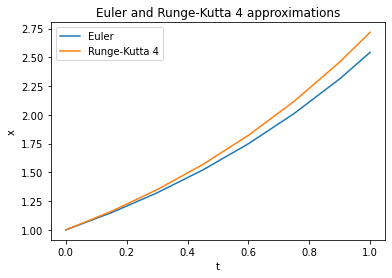

In [39]:
#plotting approximations
plt.plot(t,x, label = 'Euler')
plt.plot(t2,x2, label = 'Runge-Kutta 4')
plt.ylabel('x')
plt.xlabel('t')
plt.title('Euler and Runge-Kutta 4 approximations')
plt.legend(loc = 'best')
plt.show()

In [40]:
t = np.arange(0.001, 1, 0.001)
(Euler_error, RK4_error) = error_delta_t(t)

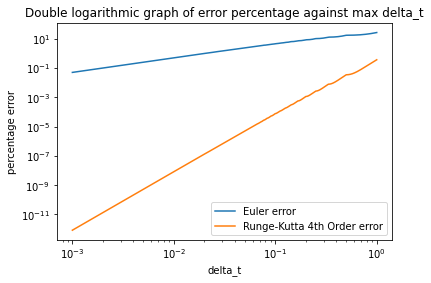

In [41]:
#plotting the double log graph of error against delta_t
plt.loglog(t, Euler_error, label = 'Euler error')
plt.loglog(t, RK4_error, label = 'Runge-Kutta 4th Order error')
plt.xlabel('delta_t')
plt.ylabel('percentage error')
plt.title('Double logarithmic graph of error percentage against max delta_t')
plt.legend(loc = 'best')
plt.show()



In [42]:
def solve2nd_ode(): 
    
    def dXdt(X,t):
        x,y = X
        dx = y
        dy = -x
        dX = [dx, dy]
        return np.array(dX)

    x0 = 0
    y0 = 1
    X0 = [x0, y0]

    # Actually compute the solution: 
    X_solution = solve_ode(dXdt, X0, 0, 1, 0.3, 'e')

    # X_solution is a matrix with 200 rows and 2 columns. The first column is
    # x and the other is v.

    return X_solution

In [43]:
solve2nd_ode()

(array([[0.    , 1.    ],
        [0.3   , 1.    ],
        [0.6   , 0.91  ],
        [0.873 , 0.73  ],
        [0.946 , 0.6427]]),
 [0, 0.3, 0.6, 0.8999999999999999, 1.0])

In [44]:
#function to solve predator prey eqns 
def predprey():
    #defining variables
    a = 1
    d = 0.1
    b = 0.2
    
    X0 = [0.52, 0.35]
    #modelling equations
    def dX(X,t):
        x,y = X
        dx = x*(1-x) - (a*x*y)/(d+x)
        dy = b*y*(1-y/x)
        dX = [dx,dy]
        return np.array(dX)
    #solving
    X_solution, t = solve_ode(dX, X0, 0, 100, 0.01, 'rk4')
    X = np.array(X_solution)
    return X, t

In [45]:
X, t = predprey()

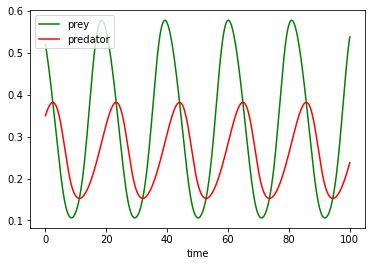

In [46]:
#plotting predator-prey against time
plt.plot(t, X[:,0], 'g', label='prey')
plt.plot(t, X[:,1], 'r', label='predator')
plt.legend()
plt.xlabel('time')
plt.show()

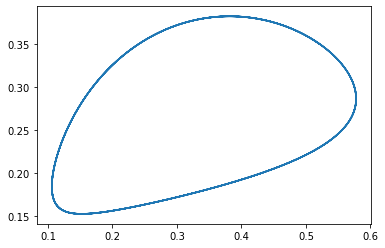

In [47]:
#plotting predator against prey
plt.plot(X[:,0], X[:,1])

In [183]:
#shooting
from scipy.optimize import fsolve

#initial conditions from isolated periodic orbit
X0 = [0.2,0.2]

def shooting():
    X_solution, t = solve_ode(dX, X0, 0, 100, 0.01, 'rk4')
    plt.plot(t, X_solution)
    plt.show()
    sol = fsolve(lambda U, f: shoot(f, U), [1,1,18], dX) # need to make own root-finding
    U0 = sol[:-1]
    T = sol[-1]
    print('U0: ', U0)
    print('Period: ',T)
    X_solution, t = solve_ode(dX, U0, 0, T, 0.01, 'rk4')
    plt.plot(t, X_solution)
    plt.show()

In [184]:
#finding residue of integration
def integral_res(method, f, X0, t0, T):
    X_solution, t = solve_ode(dX, X0, t0, T, 0.001, method)
    return X_solution[-1] - X0

In [185]:
#phase condition
def phase(f, X0):
    return np.array([f(X0, 0)[0]])

In [186]:
#singular shot 
def shoot(f, X):
    X0 = X[:2]
    T = X[-1]
    return np.concatenate((integral_res('rk4', dX, X0, 0, T), phase(dX, X0)))

In [187]:
def dX(X, t):
    a = 1
    d = 0.1
    b = 0.2
    x, y = X
    dx = x*(1-x) - (a*x*y)/(d+x)
    dy = b*y*(1-y/x)
    dX = [dx,dy]
    return np.array(dX)

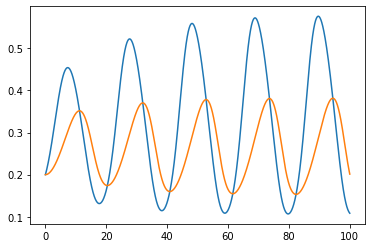

[ 0.57787148  0.28614888 20.81686658]
U0:  [0.57787148 0.28614888]
Period:  20.81686658406817


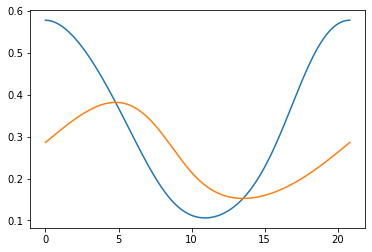

In [188]:
shooting()

In [ ]:
#making own rootfinder using newtons method
def rootfinder(f, df, X0)
    X0